<center>

# Shenfun - High-Performance Computing platform for the Spectral Galerkin method

<div><img src="https://rawcdn.githack.com/spectralDNS/spectralutilities/f3419a3e6c40dad55be5dcca51f6e0e21713dd90/figures/Chebyshev_Polynomials_of_the_First_Kind.svg" width="300"></div>


# Spectral Galerkin solution procedure

1. Choose function space(s) satisfying the correct boundary conditions
2. Transform PDEs to variational forms using inner products
3. Assemble variational forms and solve resulting linear algebra systems

# Orthogonal bases

<p style="margin-bottom:1cm;">

| Family    | Basis                                    | Weight   | Domain    |
|  :---:    |         :---:                            | :---:    |  :---:   |
| Chebyshev | $\{T_k\}_{k=0}^{N-1}$                  | $1/\sqrt{1-x^2}$ | $[-1, 1]$ |
| Legendre  | $\{L_k\}_{k=0}^{N-1}$                  |  1       |$[-1, 1]$ |
| Jacobi    | $\{J_k^{(\alpha,\beta)}\}_{k=0}^{N-1}$ | $(1-x)^{\alpha}(1+x)^{\beta}$ |  $[-1, 1]$ |
| Fourier   | $\{\exp(\text{i}kx)\}_{k=-N/2}^{N/2-1}$| $1/(2\pi)$  |$[0, 2\pi]$ |
| Hermite   | $\{H_k\}_{k=0}^{N-1}$                  | $e^{-x^2/2}$        | $[-\infty, \infty]$|
| Laguerre  | $\{La_k\}_{k=0}^{N-1}$                 | $e^{-x/2}$        | $[0, \infty]$ |


In [1]:
from shenfun import *
N = 8
C = FunctionSpace(N, 'Chebyshev', domain=[-2, 2])
L = FunctionSpace(N, 'Legendre', domain=[0, 1])
x, w = C.points_and_weights()
print(C.points_and_weights())
C.basis_function(4)

(array([ 0.98078528,  0.83146961,  0.55557023,  0.19509032, -0.19509032,
       -0.55557023, -0.83146961, -0.98078528]), array([0.39269908, 0.39269908, 0.39269908, 0.39269908, 0.39269908,
       0.39269908, 0.39269908, 0.39269908]))


8*x**4 - 8*x**2 + 1

## Find best approximation of $f(x) = x^2$, for $x \in [0, 1]$

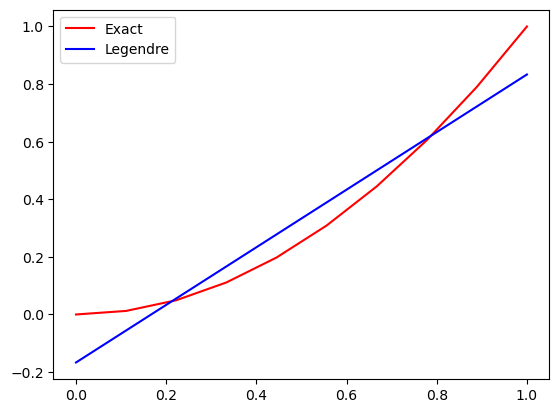

In [4]:
import matplotlib.pyplot as plt
import sympy as sp
x = sp.Symbol('x')
f = x**2
L = FunctionSpace(2, 'Legendre', domain=(0, 1))
uN = Function(L, buffer=f)
xj = np.linspace(0, 1, 10)
plt.plot(xj, xj**2, 'r', xj, uN(xj), 'b')
plt.legend(['Exact', 'Legendre']);

# Bases for Dirichlet boundary conditions
<p style="margin-bottom:1cm;">


| family    | Basis                 | Boundary condition |
|-----------|-----------------------|----------|
| Chebyshev | $\{T_k-T_{k+2}\}_{k=0}^{N-3}$ | $u(\pm 1) = 0$ |
| Legendre  | $\{L_k-L_{k+2}\}_{k=0}^{N-3}$ | $u(\pm 1) = 0$ |
| Hermite   | $\exp(-x^2)\{H_k\}_{k=0}^{N-1}$ | $u(\pm \infty) = 0$ |
| Laguerre  | $\exp(-x/2)\{La_k-La_{k+1}\}_{k=0}^{N-2}$| $u(0) = u(\infty) = 0$ |

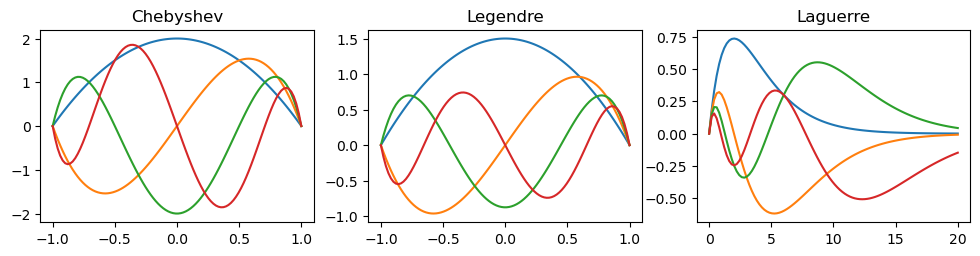

In [5]:
CD = FunctionSpace(N, 'Chebyshev', bc=(0, 0))
LD = FunctionSpace(N, 'Legendre', bc=(0, 0))
La = FunctionSpace(N, 'Laguerre', bc=(0, None))
xj = np.linspace(-1, 1, 100)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 2.5))
for i in range(4):
    ax1.plot(xj, sp.lambdify(x, CD.basis_function(i))(xj))
    ax2.plot(xj, sp.lambdify(x, LD.basis_function(i))(xj)) 
    ax3.plot(10*(xj+1), sp.lambdify(x, La.basis_function(i))(10*(xj+1)))
ax1.set_title('Chebyshev')
ax2.set_title('Legendre')
ax3.set_title('Laguerre');

# Neumann boundary conditions $u'(\pm 1) = 0$

<p style="margin-bottom:1cm;">

| family    | Basis                 |
|-----------|-----------------------|
| Chebyshev | $\left\{T_k-\frac{k^2}{(k+2)^2}T_{k+2}\right\}_{k=0}^{N-3}$ | 
| Legendre  | $\left\{L_k-\frac{k(k+1)}{(k+2)(k+3)}L_{k+2}\right\}_{k=0}^{N-3}$ |

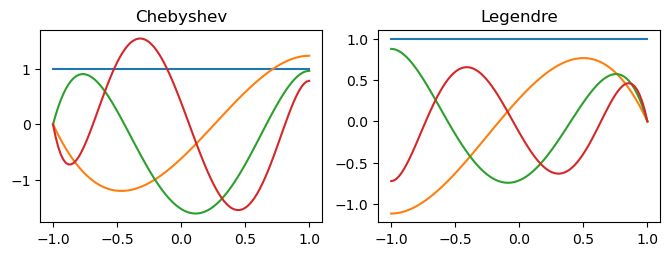

In [7]:
CN = FunctionSpace(N, 'Chebyshev', bc={'left': ('D', 0), 'right': ('N', 0)})
LN = FunctionSpace(N, 'Legendre', bc={'left': ('N', 0), 'right': ('D', 0)})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2.5))
ax1.plot(xj, np.ones(100))
ax2.plot(xj, np.ones(100))
for i in range(1, 4):
    ax1.plot(xj, sp.lambdify(x, CN.basis_function(i))(xj))
    ax2.plot(xj, sp.lambdify(x, LN.basis_function(i))(xj))
ax1.set_title('Chebyshev')
ax2.set_title('Legendre');

# Biharmonic bases $u(\pm 1) = u'(\pm 1) = 0$
<p style="margin-bottom:1cm;">

| family    | Basis                 |
|-----------| :-----------------:   |
| Chebyshev | $\left\{T_k-\frac{2(k+2)}{k+3}T_{k+2}+\frac{k+1}{k+3} T_{k+4}\right\}_{k=0}^{N-5}$ | 
| Legendre  | $\left\{L_k-\frac{2(2k+5)}{(2k+7)}L_{k+2}+\frac{2k+3}{2k+7}L_{k+4}\right\}_{k=0}^{N-5}$ |


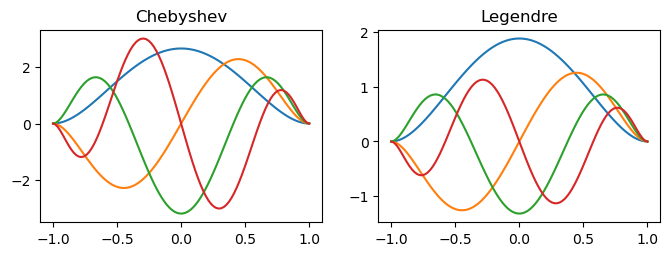

In [8]:
CB = FunctionSpace(N, 'Chebyshev', bc=(0, 0, 0, 0))
LB = FunctionSpace(N, 'Legendre', bc=(0, 0, 0, 0))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2.5))
for i in range(4):
    ax1.plot(xj, sp.lambdify(x, CB.basis_function(i))(xj))
    ax2.plot(xj, sp.lambdify(x, LB.basis_function(i))(xj))
ax1.set_title('Chebyshev')
ax2.set_title('Legendre');

# Multidimensional tensor product spaces
<p style="margin-bottom:0.5cm;">

$$
\begin{align}
L_0 &= \{L_k(x)-L_{k+2}(x)\}_{k=0}^{N-3} \\
C_0 &= \{T_k(x)-T_{k+2}(x)\}_{k=0}^{N-3} \\
L_1 &= \{L_l(y)\}_{l=0}^{N-1} \\
LL(x, y) &= L_0(x) \otimes L_1(y) \\
CL(x, y) &= C_0(x) \otimes L_1(y)
\end{align}
$$


In [9]:
L0 = FunctionSpace(N, 'Legendre', bc=(0, 0))
C0 = FunctionSpace(N, 'Chebyshev', bc=(0, 0))
L1 = FunctionSpace(N, 'Legendre')
LL = TensorProductSpace(comm, (L0, L1)) # comm is MPI.COMM_WORLD
CL = TensorProductSpace(comm, (C0, L1))
V = VectorSpace(LL) # For vector valued functions
f = Array(LL)

# Operators in shenfun

Act on instances of a `TestFunction`, `TrialFunction` or `Function`

- div
- grad
- curl
- Dx   (for a partial derivative)

# Assembly
- project
- inner

In [11]:
L0 = FunctionSpace(N, 'Legendre', bc=(0, 0))
L1 = FunctionSpace(N, 'Legendre')
u = TrialFunction(L0)
v = TestFunction(L0)
uh = Function(L0)
g = Array(L0)
du = grad(u)  # vector valued expression
h = div(grad(u))   # scalar valued expression
A = inner(div(grad(u)), v)
A.diags().toarray() # diagonal stiffness matrix

array([[ -6.,   0.,   0.,   0.,   0.,   0.],
       [  0., -10.,   0.,   0.,   0.,   0.],
       [  0.,   0., -14.,   0.,   0.,   0.],
       [  0.,   0.,   0., -18.,   0.,   0.],
       [  0.,   0.,   0.,   0., -22.,   0.],
       [  0.,   0.,   0.,   0.,   0., -26.]])

$$
(\nabla^2 u, v)
$$

$$
\sum_{j=0}^N(\psi^{''}_j, \psi_i) \hat{u}_j
$$

The `inner` function represents the $L^2$ inner product $(f, g)$, computed by default using numerical quadrature

$$
(f, g) = \sum_{j=0}^{N-1} f(x_j)g(x_j) w_j \approx \int_{-1}^1 f(x) g(x) dx
$$

with that basis' quadrature points $\{x_j\}_{j=0}^{N-1}$ and weights $\{w_j\}_{j=0}^{N-1}$.

# The shenfun `Function` represents the solution

`uh = Function(L0)`

$$
u_h(x) = \sum_{k=0}^{N-1} \hat{u}_k \phi_{k}(x)
$$

The function evaluated for all quadrature points is an `Array`. 

`uj = Array(L0)`

There is a (fast) `backward` transform for moving from `Function` to `Array`, and a `forward` transform to go the other way.

In [ ]:
uj = Array(L0)
uj = uh.backward(uj)
uh = uj.forward(uh)

Here `uj` represents $\{u_h(x_j)\}_{j=0}^{N-1}$.

# Projections

Project $g(\mathbf{x})$ to $V$:

Find $u$ in $V$ such that:

$$(u, v)_w = (I^Ng, v)_w \quad \text{for} \, v \in V $$

where $I^Ng$ is $\{g(x_j)\}_{j=0}^{N-1}$, i.e., $g(x)$ evaluated on the quadrature mesh.

Works if $g(x)$ is 

- an `Array`, which is exactly a `Function` evaluated on the mesh
- an expression involving a `Function`, like `div(grad(uh))`
- a `sympy` expression, like `sin(x)`





In [ ]:
dudx = project(Dx(uh, 0, 1), L1) # Compute du/dx
wh = project(uj, L1)
import sympy as sp
x, y = sp.symbols('x,y')
ws = project(sp.sin(4*x), L1)
ws.eval(np.array([0.51]))

# Implementation matches mathematics
<p style="margin-bottom:1cm;">

$$
A = (\nabla u, \nabla v)_w^N
$$

In [ ]:
A = inner(grad(u), grad(v))

In [ ]:
dict(A)

In [ ]:
print(A.diags().todense())

A diagonal stiffness matrix!

$$
\nabla^2 u(x) = f(x), \quad u(\pm 1)=0
$$

# Complete Poisson solver with error verification in 1D


In [19]:
# Solve Poisson's equation
import matplotlib.pyplot as plt
from sympy import symbols, sin, cos, lambdify
from shenfun import * 

# Use sympy to compute manufactured solution
x, y = symbols("x,y")
ue = sin(8*sp.pi*x) # `ue` is the manufactured solution
fe = ue.diff(x, 2) # `fe` is Poisson's right hand side for `ue`

SD = FunctionSpace(44, 'L', bc=(0, 0))
u = TrialFunction(SD)
v = TestFunction(SD)

b = inner(v, Array(SD, buffer=fe)) # Array is initialized with `fe`
A = inner(v, div(grad(u)))

uh = Function(SD)
uh = A.solve(b, uh)
ue = Array(SD, buffer=ue)
print("L2-error = ", np.sqrt(inner(1, (uh.backward()-ue)**2)))

L2-error =  2.3295582814865546e-08


### Plot the error

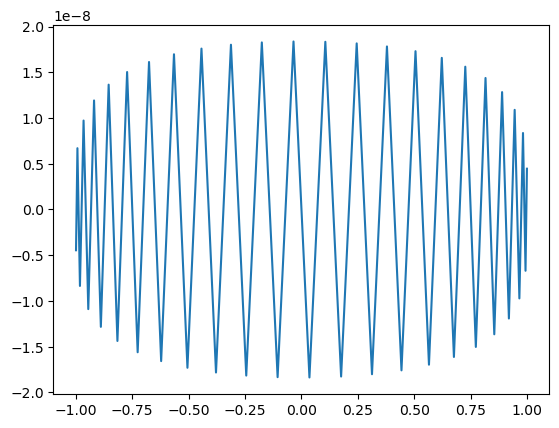

In [20]:
plt.plot(SD.mesh(), uh.backward()-ue);

# 2D - still closely matching mathematics

In [ ]:
L0 = FunctionSpace(N, 'Legendre', bc=(0, 0))
F1 = FunctionSpace(N, 'Fourier', dtype='d')
TP = TensorProductSpace(comm, (L0, F1))
u = TrialFunction(TP)
v = TestFunction(TP)
A = inner(grad(u), grad(v))

In [ ]:
print(A)

# ? 

A is a list of two TPMatrix objects???


# `TPMatrix` is a Tensor Product matrix

A `TPMatrix` is the outer product of smaller matrices (2 in 2D, 3 in 3D etc).  

Consider the inner product:

$$
\begin{align}
(\nabla u, \nabla v)_w &= \frac{1}{2\pi}\int_{-1}^{1}\int_{0}^{2\pi} \left(\frac{\partial u}{\partial x}, \frac{\partial u}{\partial y}\right) \cdot \left(\frac{\partial \overline{v}}{\partial x}, \frac{\partial \overline{v}}{\partial y}\right) {dxdy} \\
(\nabla u, \nabla v)_w &= \frac{1}{2\pi}\int_{-1}^1 \int_{0}^{2\pi} \frac{\partial u}{\partial x}\frac{\partial \overline{v}}{\partial x} {dxdy} + \int_{-1}^1 \int_{0}^{2\pi} \frac{\partial u}{\partial y}\frac{\partial \overline{v}}{\partial y} {dxdy}
\end{align}
$$

which, like `A`, is a sum of two terms. These two terms are the two `TPMatrix`es returned by `inner` above.

Now each one of these two terms can be written as the outer product of two smaller matrices. 

Consider the first, inserting for test and trial functions

$$
\begin{align}
v &= \phi_{kl} = (L_k(x)-L_{k+2}(x))\exp(\text{i}ly) \\
u &= \phi_{mn}
\end{align}
$$

The first term becomes

$$
\small
\begin{align}
\int_{-1}^1 \int_{0}^{2\pi} \frac{\partial u}{\partial x}\frac{\partial \overline{v}}{\partial x} \frac{dxdy}{2\pi} &= \underbrace{\int_{-1}^1 \frac{\partial (L_m-L_{m+2})}{\partial x}\frac{\partial (L_k-L_{k+2})}{\partial x} {dx}}_{a_{km}} \underbrace{\int_{0}^{2\pi}  \exp(iny) \exp(-ily) \frac{dy}{2\pi}}_{\delta_{ln}} \\
   &= a_{km} \delta_{ln}
\end{align}
$$

and the second

$$
\small
\begin{align}
\int_{-1}^1 \int_{0}^{2\pi} \frac{\partial u}{\partial y}\frac{\partial \overline{v}}{\partial y} \frac{dxdy}{2\pi} &= \underbrace{\int_{-1}^1 (L_m-L_{m+2})(L_k-L_{k+2}) {dx}}_{b_{km}} \underbrace{\int_{0}^{2\pi} ln \exp(iny) \exp(-ily)\frac{dy}{2\pi}}_{l^2\delta_{ln}} \\
   &= l^2 b_{km} \delta_{ln}
\end{align}
$$

All in all:

$$
(\nabla u, \nabla v)_w = \left(a_{km} \delta_{ln} + l^2 b_{km} \delta_{ln}\right)
$$

The sum of two tensor product matrices!

In [ ]:
A = inner(grad(u), grad(v)) # <- list of two TPMatrices
for mat in A[0].mats:  # a_{km} and \delta_{ln}
    print(mat.diags().todense())

Plot the flattened tensor product matrix. That is, the 2D matrix you get by using Kronecker product $A \otimes I$ between the two matrices $a_{km}$ and $\delta_{ln}$. This is often referred to as vectorization.

In [ ]:
plt.spy(A[1].diags(), markersize=1);

# 3D Poisson (with MPI and Fourier x 2)

In [ ]:
#%%file poisson3D.py
from sympy import symbols, sin, cos, lambdify
from shenfun import *

# Use sympy to compute manufactured solution
x, y, z = symbols("x,y,z")
ue = (cos(4*x) + sin(2*y) + sin(4*z))*(1-x**2)
fe = ue.diff(x, 2) + ue.diff(y, 2) + ue.diff(z, 2)

C0 = FunctionSpace(32, 'Chebyshev', bc=(0, 0))
F1 = FunctionSpace(32, 'Fourier', dtype='D')
F2 = FunctionSpace(32, 'Fourier', dtype='d')
T = TensorProductSpace(comm, (C0, F1, F2))
u = TrialFunction(T)
v = TestFunction(T)

# Assemble left and right hand
f_hat = inner(v, Array(T, buffer=fe))
A = inner(v, div(grad(u)))

# Solve
solver = chebyshev.la.Helmholtz(*A)
u_hat = Function(T)
u_hat = solver(f_hat, u_hat)
assert np.linalg.norm(u_hat.backward()-Array(T, buffer=ue)) < 1e-12
print(u_hat.shape)

# Contour plot of slice with constant y

In [ ]:
X = T.local_mesh()
ua = u_hat.backward()
plt.contourf(X[2][0, 0, :], X[0][:, 0, 0], ua[:, 2], 100)
plt.colorbar()

# Run with MPI distribution of arrays

Here we would normally run from a bash shell
<p style="margin-bottom:0.5cm;">

<div style="color:black"> <strong>[bash shell] mpirun -np 4 python poisson3D.py </strong> </div>

Since we are in a Jupyter notebook, lets actually do this from python in a live cell:-) The exclamation mark '!' is a magic command to run bash scripts in Jupyter. 

In [ ]:
!mpirun -np 8 python poisson3D.py 2>/dev/null

Note that Fourier bases are especially attractive because of features easily handled with MPI:

    - diagonal matrices
    - fast transforms

# Nonlinearities (convolution)
All treated with pseudo-spectral techniques

$$
\begin{align}
\hat{w}_k &= \widehat{u^2}_k
\end{align}
$$

That is, transform `Function`s to real space `Array`s, perform the nonlinear operation there and transform the nonlinear product back to spectral space (to a `Function`).

3/2-rule or 2/3-rule is possible for dealiasing.

In [ ]:
uj = uh.backward(padding_factor=1.5)
VP = uj.function_space()
wh = VP.forward(uj*uj)

# Mixed tensor product spaces

Solve several equations simultaneously

- Coupled equations
- Block matrices and vectors
- Tensor spaces of vectors, like fluid velocity

# Stokes equations
### lid-driven cavity - coupled solver
<p style="margin-bottom:0.25cm;">

$$
\begin{align*}
\nabla^2 \mathbf{u} - \nabla p &= \mathbf{f} \quad \text{in }  \Omega, \quad \quad \Omega = [-1, 1]\times[-1, 1]\\ 
\nabla \cdot \mathbf{u} &= h \quad \text{in } \Omega  \\ 
\int_{\Omega} p dx &= 0 \\
\mathbf{u}(\pm 1, y) = \mathbf{u}(x, -1) = (0, 0) &\text{ and }\mathbf{u}(x, 1) = (1, 0) \text{ or } ((1-x^2)(1+x^2), 0)
\end{align*}
$$

Given appropriate spaces $V$ and $Q$ a variational form reads: find $(\mathbf{u}, p) \in V \times Q$ such that 

$$
\begin{equation}
a((\mathbf{u}, p), (\mathbf{v}, q)) = L((\mathbf{v}, q)) \quad \forall (\mathbf{v}, q) \in V \times Q
\end{equation}
$$

where bilinear and linear forms are, respectively

$$
\begin{equation}
    a((\mathbf{u}, p), (\mathbf{v}, q)) = \int_{\Omega} (\nabla^2 \mathbf{u} - \nabla p) \cdot {\mathbf{v}} \, dx_w + \int_{\Omega} \nabla \cdot \mathbf{u} \, {q} \, dx_w,
\end{equation}
$$
$$
\begin{equation}  
    L((\mathbf{v}, q)) = \int_{\Omega} \mathbf{f} \cdot {\mathbf{v}}\, dx_w + \int_{\Omega} h {q} \, dx_w
\end{equation}
$$

Using integration by parts for Legendre

$$
\begin{equation}
    a((\mathbf{u}, p), (\mathbf{v}, q)) = -\int_{\Omega} \nabla \mathbf{u} \cdot \nabla{\mathbf{v}} \, dx_w + \int_{\Omega} \nabla \cdot \mathbf{v} \, {p} \, dx_w + \int_{\Omega} \nabla \cdot \mathbf{u} \, {q} \, dx_w,
\end{equation}
$$

# Implementation of spaces, basis functions

In [ ]:
N = (40, 40)
family = 'Legendre'
D0X = FunctionSpace(N[0], 'Legendre', bc=(0, 0))
#D1Y = FunctionSpace(N[1], 'Legendre', bc=(1, 0)) # Regular lid
D1Y = FunctionSpace(N[1], 'Legendre', bc=(0, (1-x)**2*(1+x)**2)) # Regularized lid
D0Y = FunctionSpace(N[1], 'Legendre', bc=(0, 0))
PX = FunctionSpace(N[0], 'Legendre')
PY = FunctionSpace(N[1], 'Legendre')

# All required spaces
V1 = TensorProductSpace(comm, (D0X, D1Y))
V0 = TensorProductSpace(comm, (D0X, D0Y))
Q = TensorProductSpace(comm, (PX, PY), modify_spaces_inplace=True)
V = VectorSpace([V1, V0])
W = CompositeSpace([V0, V0])
VQ = CompositeSpace([V, Q])

# For inf-sup use P_N - P_{N-2} for velocity-pressure
PX.slice = lambda: slice(0, PX.N-2)
PY.slice = lambda: slice(0, PY.N-2)

# All required test and trial functions
up = TrialFunction(VQ)
vq = TestFunction(VQ)
u, p = up
v, q = vq

# Implementation Stokes - matrices and solve

In [ ]:
# Assemble matrices
A = inner(grad(v), -grad(u))
G = inner(div(v), p)
D = inner(q, div(u))

# Create Block matrix
sol = la.BlockMatrixSolver(A+G+D)

# Functions to hold solution and rhs
up_hat = Function(VQ)
fh_hat = Function(VQ)

# Solve Stokes problem. Note constraint for pressure
up_hat = sol(fh_hat, u=up_hat, constraints=((2, 0, 0),)) 

# Move solution to Array in real space
up = up_hat.backward()
u_, p_ = up

In [ ]:
X = Q.local_mesh(True)
plt.quiver(X[0], X[1], u_[0], u_[1])

# Sparsity pattern of block matrix

$$
M =
  \begin{bmatrix}
      A[0]+A[1] & 0 & G[0] \\
      0 & A[2]+A[3] & G[1] \\ 
      D[0] & D[1] & 0
  \end{bmatrix}
$$

In [ ]:
plt.figure(figsize=(6,4))
plt.spy(sol.mat.diags(), markersize=0.5)

# Block matrix

$$
M =
  \begin{bmatrix}
      A[0]+A[1] & 0 & G[0] \\
      0 & A[2]+A[3] & G[1] \\ 
      D[0] & D[1] & 0
  \end{bmatrix}
$$

where $D = G^T$ for the Legendre basis, making $M$ symmetric. For Chebyshev $M$ will not be symmetric.

Solver through [scipy.sparse.linalg](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html)

For Navier-Stokes of the lid-driven cavity, see https://github.com/spectralDNS/shenfun/blob/master/demo/NavierStokesDrivenCavity.py

# More documentation and demo programs

See [documentation](https://shenfun.readthedocs.io/en/latest/) and [live demos](https://mikaem.github.io/shenfun-demos/content/intro.html)